In [1]:
import pandas as pd
import numpy as np
from sklearn import *

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/anaconda3/li

In [2]:
df = pd.read_csv("/data/credit-default.csv")

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [6]:
label = "default"
X = df.drop(columns=[label]) # features
y = preprocessing.LabelEncoder().fit_transform(df[label])

X_dummy = pd.get_dummies(X, drop_first=True) # OneHot Encoding



#X: features, y: label
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                                         y, test_size = 0.3, random_state = 1546)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [7]:
pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

,actual,prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,0
7,1,0
8,1,1
9,0,1


In [8]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[184,  35],
       [ 39,  42]])

In [13]:
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

In [15]:
metrics.accuracy_score(y_test, y_test_pred)

0.7533333333333333

In [21]:
y_train_prob = pipe.predict_proba(X_train)[:, 1]
y_test_prob = pipe.predict_proba(X_test)[:, 1]

In [20]:
y_test_prob[:, 1]

array([7.53381695e-01, 3.07186305e-01, 3.67042094e-01, 4.11219762e-01,
       6.59606079e-01, 1.91106168e-01, 4.05360782e-01, 2.27557293e-01,
       6.36441497e-01, 7.59878133e-01, 4.47644615e-01, 1.45550444e-01,
       7.18390593e-01, 1.66916718e-01, 7.75532457e-03, 4.08757306e-01,
       1.32182503e-01, 9.77756801e-01, 1.94717312e-01, 2.49977699e-02,
       8.85621344e-02, 2.87590324e-01, 7.49765233e-03, 1.32290183e-01,
       2.78362678e-01, 8.91314115e-01, 5.07309786e-02, 3.76965283e-01,
       1.54899833e-01, 3.72780052e-01, 7.54565364e-01, 1.61531324e-01,
       3.15762663e-01, 3.89274402e-02, 3.15029902e-01, 4.56995558e-01,
       1.75190455e-01, 4.02210776e-01, 9.47031620e-01, 9.50887100e-01,
       9.80420370e-02, 2.50865920e-01, 7.95326865e-01, 1.89540060e-01,
       5.63452461e-01, 6.64697941e-01, 5.25013267e-01, 1.19390367e-01,
       3.09770402e-01, 5.87017348e-01, 8.42556149e-01, 6.38732171e-01,
       7.66962936e-01, 1.19369205e-01, 4.09872698e-01, 4.87363587e-02,
      

In [22]:
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[184,  35],
       [ 39,  42]])

In [23]:
y_test_pred = np.where(y_test_prob>0.3, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[146,  73],
       [ 25,  56]])

In [24]:
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
metrics.confusion_matrix(y_test, y_test_pred)

array([[211,   8],
       [ 68,  13]])

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)

In [26]:
import matplotlib.pyplot as plt

Text(0,0.5,'TPR')

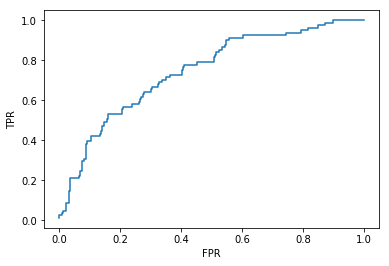

In [29]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [28]:
metrics.auc(fpr, tpr)

0.7454196967134562